In [ ]:
import os
os.chdir('/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/HACCnPaint/Cores/PaintCores_lcx')

import numpy as np
import h5py

# %%
import numexpr
# numexpr.set_num_threads(min(8, numexpr.detect_number_of_cores()))
numexpr.set_num_threads(64)

import time
time0 = time.time()
import glob
import pandas as pd

import matplotlib.pyplot as plt
# import haccytrees.mergertrees
# import pygio
# import os

# os.environ["CUDA_32VISIBLE_DEVICES"] = ""

import simulation_models
# import cosmology_utils
# import cores_analysis
import plot_utils
# import lightcone_tree_matching
# import bpl_analysis
import painting
import catalog_io
import yaml_read
import photometry
# import scipy.spatial


%matplotlib inline


# from mpi4py import MPI
from numba import config
config.THREADING_LAYER = 'workqueue'

In [ ]:
config = yaml_read.yaml_config('config_LJ.yml')
target_skypatch_id = config['hacc_simulation']['skypatchID']
target_skypatch_id = 1
print(target_skypatch_id)

1


In [ ]:
def load_matches_from_h5(output_file):
    combined_data = {}
    with h5py.File(output_file, "r") as f:
        for core_key in f.keys():
            for key in f[core_key].keys():
                if key not in combined_data:
                    combined_data[key] = []
                combined_data[key].append(f[core_key][key][...])
    # Concatenate lists of arrays into single arrays for each key
    for key in combined_data:
        combined_data[key] = np.concatenate(combined_data[key], axis=0)
    return combined_data

output_file = f"../PaintCores_lcx/mocks/finished_mocks/supermock_lightcone_skypatch_{target_skypatch_id}.h5"
# Load matches_for_lc from the HDF5 file
matches_for_lc = load_matches_from_h5(output_file)

print('Available match keys: ', matches_for_lc.keys())
print('Matches: ', matches_for_lc['x'].shape, 'Skypatch: ', target_skypatch_id)

Available match keys:  dict_keys(['central', 'core_state', 'core_tag', 'dec', 'fof_halo_tag', 'merged', 'peak_mass', 'ra', 'rank_peak_mass', 'redshift', 'sfh', 'stellar_mass', 't25_a1', 't50_a1', 'time_infall', 'vx', 'vy', 'vz', 'x', 'y', 'z'])
Matches:  (36164872,) Skypatch:  1


In [ ]:
cosmo = simulation_models.get_cosmo(config['hacc_simulation']['name'])

In [ ]:
match_redshift = matches_for_lc['redshift']#[:1000]
match_sfh = matches_for_lc['sfh'][:, np.newaxis, :]#[:1000]
central_cond = matches_for_lc['central']
merged_cond = matches_for_lc['merged']

In [ ]:
match_sfh.shape, match_redshift.shape, matches_for_lc['peak_mass'].shape, matches_for_lc['stellar_mass'].shape

((36164872, 1, 117), (36164872,), (36164872,), (36164872,))

In [ ]:
# central_cond

/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/HACCnPaint/Cores/PaintCores_lcx/plot_utils.py:406: RuntimeWarning: invalid value encountered in log10
  corner.hist2d( x=np.log10(Mpeak),


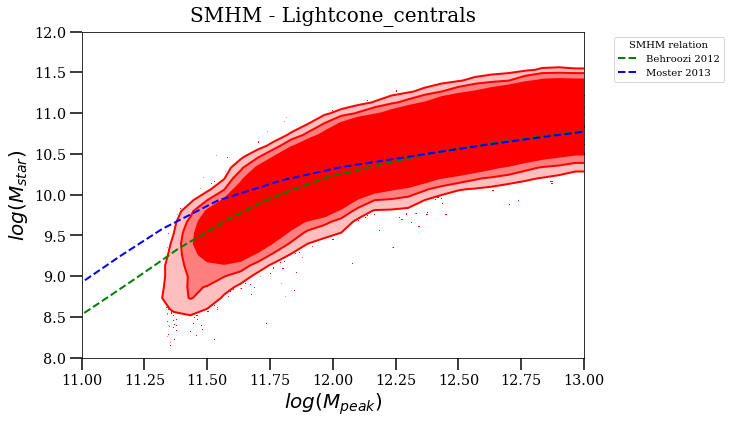

<Figure size 432x288 with 0 Axes>

In [ ]:
# plt.hist(np.log10(matches_for_lc['peak_mass']), alpha=0.5, bins=100);
plot_utils.plot_SMHM_comparison(matches_for_lc['peak_mass'][::1], matches_for_lc['stellar_mass'][::1], 'Lightcone_centrals')
# plt.hist(matches_for_lc['redshift'], alpha=0.5, bins=100);
# plot_utils.basemap_plot(matches_for_lc['ra'], matches_for_lc['dec'])
# plt.hist(np.log10(matches_for_lc[0]['stellar_mass']), alpha=0.5, bins=100);
# plt.plot(matches_for_lc['sfh'][0:10].T, alpha=0.5); 
# plt.yscale('log')
# plt.ylim(1e-3, )

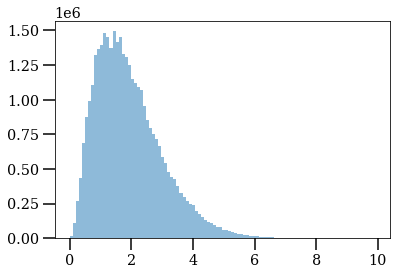

In [ ]:
# plt.hist(np.log10(matches_for_lc['peak_mass']), alpha=0.5, bins=100);
# plot_utils.plot_SMHM_comparison(matches_for_lc['peak_mass'], matches_for_lc['stellar_mass'], 'Lightcone_centrals')
plt.hist(matches_for_lc['redshift'], alpha=0.5, bins=100);
# plot_utils.basemap_plot(matches_for_lc['ra'], matches_for_lc['dec'])
# plt.hist(np.log10(matches_for_lc[0]['stellar_mass']), alpha=0.5, bins=100);
# plt.plot(matches_for_lc['sfh'][0:10].T, alpha=0.5);

## Loading paint

In [ ]:
def load_matches_from_h5(output_file):
    combined_data = {}
    with h5py.File(output_file, "r") as f:
        for key in f.keys():
            combined_data[key] = f[key][...]  # Read the entire dataset into memory
    return combined_data

In [ ]:
output_file = f"../PaintCores_lcx/mocks/paint_models/finished_paints/paint_preds_skypatch_{target_skypatch_id}.h5"

sed_for_lc = load_matches_from_h5(output_file)

print('Available match keys: ', sed_for_lc.keys())
print('Matches: ', sed_for_lc['SED'].shape, 'Skypatch: ', target_skypatch_id)

Available match keys:  dict_keys(['SED', 'core_tag'])
Matches:  (36164872, 1963) Skypatch:  1


In [ ]:
sed_for_lc['SED'].shape

(36164872, 1963)

In [ ]:
matches_for_lc

{'central': array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 'core_state': array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 'core_tag': array([324424061260136853, 342438459769619034, 342438459769618493, ...,
        734249462687345571, 698225063714881668, 734253860733849365]),
 'dec': array([66.474, 66.48 , 66.461, ..., 66.602, 67.052, 66.701]),
 'fof_halo_tag': array([736926903398, 737042551913, 736002037870, ..., 709124086206,
        720337863108, 721147004674]),
 'merged': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'peak_mass': array([4.161e+13, 4.161e+13, 4.161e+13, ..., 9.158e+11, 6.030e+12,
        2.560e+12], dtype=float32),
 'ra': array([230.992, 230.982, 230.975, ..., 180.032, 180.024, 180.085]),
 'rank_peak_mass': array([6.305e-11, 0.000e+00, 7.881e-12, ..., 3.870e-09, 3.822e-09,
        4.051e-09]),
 'redshift': array([5.329, 5.317, 5.282, ..., 2.097, 2.079, 2.019]),
 'sfh': array([[0.   , 0.   , 0.   , ..., 0.066, 0.086, 0.097],
        [0.   , 0.   , 0.   , ..., 0.066, 0.086

In [ ]:
# adsdsdasdfd

In [ ]:
(matches_for_lc['core_tag'] == sed_for_lc['core_tag']).all()

True

In [ ]:
dirIn1 = '/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/TrainingData/Data/Damp_red_centrals_100k_z10/'
dirIn2 = '/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/TrainingData/Data/Damp_red_noncentrals_100k_z10/'

nranks = 16
rnd_seed = 42
wave_cen = np.concatenate([np.load(dirIn1 + 'wave_spec' + str(rnd_seed) + '_rank' + str(rank) + '.npy') for rank in range(nranks)], axis=0)
reds_cen = np.concatenate([np.load(dirIn1 +'redshift' + str(rnd_seed) + '_rank' + str(rank) + '.npy') for rank in range(nranks)], axis=0)
wave_unred_cen = wave_cen/(1+reds_cen)[:, np.newaxis]

nranks = 16
rnd_seed = 14
wave_sat = np.concatenate([np.load(dirIn2 + 'wave_spec' + str(rnd_seed) + '_rank' + str(rank) + '.npy') for rank in range(nranks)], axis=0)
reds_sat = np.concatenate([np.load(dirIn2 +'redshift' + str(rnd_seed) + '_rank' + str(rank) + '.npy') for rank in range(nranks)], axis=0)
wave_unred_sat = wave_sat/(1+reds_sat)[:, np.newaxis]

print('(wave_unred_cen[0] - wave_unred_sat[0]).min() = ', (wave_unred_cen[0] - wave_unred_sat[0]).min()) 

wave_unred = wave_unred_cen[0]


def load_wave_unred():
    dirIn1 = '/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/TrainingData/Data/Damp_red_centrals_100k_z10/'
    dirIn2 = '/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/TrainingData/Data/Damp_red_noncentrals_100k_z10/'
    nranks = 16
    rnd_seed = 42
    wave_cen = np.concatenate([np.load(dirIn1 + 'wave_spec' + str(rnd_seed) + '_rank' + str(rank) + '.npy')
                               for rank in range(nranks)], axis=0)
    reds_cen = np.concatenate([np.load(dirIn1 + 'redshift' + str(rnd_seed) + '_rank' + str(rank) + '.npy')
                               for rank in range(nranks)], axis=0)
    wave_unred_cen = wave_cen/(1+reds_cen)[:, np.newaxis]
    nranks = 16
    rnd_seed = 14
    wave_sat = np.concatenate([np.load(dirIn2 + 'wave_spec' + str(rnd_seed) + '_rank' + str(rank) + '.npy')
                               for rank in range(nranks)], axis=0)
    reds_sat = np.concatenate([np.load(dirIn2 + 'redshift' + str(rnd_seed) + '_rank' + str(rank) + '.npy')
                               for rank in range(nranks)], axis=0)
    wave_unred_sat = wave_sat/(1+reds_sat)[:, np.newaxis]
    wave_unred = wave_unred_cen[0]
    return wave_unred

wave_unred = load_wave_unred()

(wave_unred_cen[0] - wave_unred_sat[0]).min() =  -1.4901161193847656e-08


In [ ]:
def load_model_and_scalers(scaler_output_path):
    import pickle

    with open(scaler_output_path, 'rb') as f:
        scaler_output = pickle.load(f)
    
    return scaler_output

def unscale_sed(scaler_output, scaled_sed):
    model_output_log = scaler_output.inverse_transform(scaled_sed)
    sed_unscaled = 10**(model_output_log)
    
    return sed_unscaled
    

scaler_output_path = './trained_painting_NNs/eline_output_scale_damp_central_noncentral_z10.pkl'    
scaler_output = load_model_and_scalers(scaler_output_path)

In [ ]:
# wave_unred.min(), (wave_unred*(1 + match_redshift[gal_idx])).min(), wave_unred.max(), (wave_unred*(1 + match_redshift[gal_idx])).max()

In [ ]:
config['painting_model']['wave_min'], config['painting_model']['wave_max']

(90, 100000)

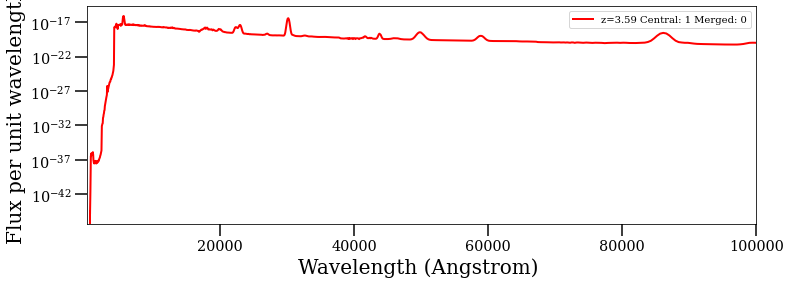

In [ ]:
wave_min = config['painting_model']['wave_min']
wave_max = config['painting_model']['wave_max']

wave_min = 90
wave_max = 100000


gal_idx = 32544
each_wave_red = wave_unred*(1 + match_redshift[gal_idx])
each_sed = sed_for_lc['SED'][gal_idx].reshape(-1, 1).T

sed_unscaled = unscale_sed(scaler_output, each_sed)[0]


plt.figure(21, figsize = (12, 4))
plt.plot(each_wave_red, sed_unscaled, color='r', label='z=%.2f'%match_redshift[gal_idx] + ' Central: %d'%central_cond[gal_idx] + ' Merged: %d'%merged_cond[gal_idx]);
plt.xlim(wave_min, wave_max)
plt.ylabel('Flux per unit wavelength')
plt.xlabel('Wavelength (Angstrom) ')
plt.legend()
plt.yscale('log')

In [ ]:
np.min(wave_cen, axis=1).max(), wave_min, np.max(wave_cen, axis=1).min(), wave_max

(1000.9834102518313, 90, 100028525.16054355, 100000)

In [ ]:
# wave_unred

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import ListedColormap
from getdist import plots, MCSamples
import corner
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors  

def plot_SED(pcolor_all, wave_unnred, redshift_in, wave_min, wave_max, plt_title):
    plt.clf()
    plt.close('all')
    
    np.random.seed(1)
    plt.figure(figsize = (12, 4))

    # galID_arr =  np.arange(0, pcolor_all.shape[1])
    galID_arr =  np.random.randint(0, pcolor_all.shape[0], 5)

    colorparams = galID_arr
    colormap = plt.get_cmap('viridis', 10)
    normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))


    for idx, galID in enumerate(galID_arr):
        print(idx, galID)
        print(wave_unnred.shape)

        color = colormap(normalize(galID))

        # wave_mask = np.where( (wave_unnred[0]>wave_min) & (wave_unnred[0]<wave_max))
        wave_mask = np.where( (wave_unnred>wave_min) & (wave_unnred<wave_max))
        # wave_mask = True
        
        each_wave_red = wave_unnred[wave_mask]*(1 + redshift_in[galID])
        
        print(each_wave_red.shape, pcolor_all[galID, wave_mask][0].shape, redshift_in[galID], each_wave_red.shape)

        print('P', pcolor_all[galID, wave_mask].shape)
        # sed_unscaled = unscale_sed(scaler_output, pcolor_all[galID].reshape(-1, 1).T)
        
        # print('S', sed_unscaled.shape)

        plt.plot(each_wave_red, pcolor_all[galID, wave_mask][0],  color = color, alpha=1, label='z=%.2f'%redshift_in[galID]);
        
        # plt.plot(wave, np.median(pcolor_all[:, galID, :].T, axis=1)*1./(4*np.pi*dd1**2),  color = color, alpha=1, linewidth = 0.8, label='z=%.2f'%redshift_in[0, idx]);
        # plt.plot(wave, np.median(pcolor_all[:, galID, :].T, axis=1),  color = color, alpha=1, linewidth = 0.8, linestyle = '-.', label='z=%.2f'%redshift_in[0, idx]);


    plt.ylabel('Flux per unit wavelength')
    plt.xlabel('Wavelength (Angstrom) ')

    plt.yscale('log')
    plt.legend(ncol=1, title='Redshift')
    plt.xlim(wave_min, wave_max)

    # plt.savefig('plots/sed_'+ plt_title +'.png',bbox_inches='tight',dpi = 300)
    plt.show()

In [ ]:
sed_for_lc['SED'][0:20].shape, match_redshift[0:20].shape, wave_unred.shape, config['painting_model']['wave_min'], config['painting_model']['wave_max']

((20, 1963), (20,), (1963,), 90, 100000)

In [ ]:
sed_unscaled = unscale_sed(scaler_output, sed_for_lc['SED'][0:10])

In [ ]:
sed_unscaled.shape, match_redshift.shape

((10, 1963), (36164872,))

0 5
(1963,)
(1212,) (1212,) 5.271455801727503 (1212,)
P (1, 1212)
1 8
(1963,)
(1212,) (1212,) 5.2337310244604325 (1212,)
P (1, 1212)
2 9
(1963,)
(1212,) (1212,) 5.293235651661689 (1212,)
P (1, 1212)
3 5
(1963,)
(1212,) (1212,) 5.271455801727503 (1212,)
P (1, 1212)
4 0
(1963,)
(1212,) (1212,) 5.328898932900119 (1212,)
P (1, 1212)


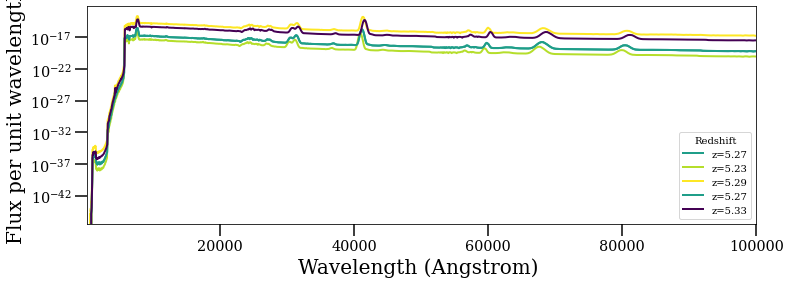

In [ ]:
# plot_SED(sed_unscaled, wave_unred, match_redshift[0:20], config['painting_model']['wave_min'], config['painting_model']['wave_max'], "Random")
plot_SED(sed_unscaled, wave_unred, match_redshift[0:10], config['painting_model']['wave_min'], config['painting_model']['wave_max'], "Random")

## Loading photometry

In [ ]:
output_file = f"../PaintCores_lcx/mocks/photometry/photometry_skypatch_{target_skypatch_id}.h5"
photo_for_lc = load_matches_from_h5(output_file)

print('Available match keys: ', photo_for_lc.keys())
print('Matches: ', photo_for_lc['SPHEREx'].shape, 'Skypatch: ', target_skypatch_id)

Available match keys:  dict_keys(['2MASS', 'COSMOS', 'F784', 'LEGACYSURVEY', 'LSST', 'SPHEREx', 'WISE'])
Matches:  (36164872, 102) Skypatch:  1


In [ ]:
print('Matches: ', photo_for_lc['SPHEREx'].shape, 'Skypatch: ', target_skypatch_id)

Matches:  (36164872, 102) Skypatch:  1


In [ ]:
photo_for_lc['LSST'].max()

117.85477

In [ ]:
import pickle 
from scipy.integrate import simps
from scipy.interpolate import interp1d as interp1d
import glob
import matplotlib.pylab as plt
import pickle


# Wave, filters, etc.
# wave_unred = load_wave_unred()
# wave_lims = [config['painting_model']['wave_min'], config['painting_model']['wave_max']]
wave_lims = [wave_min, wave_max]

spherex_filter_pickle = config['painting_model']['spherex_filter_pickle']
lsst_filter_pickle = config['painting_model']['lsst_filter_pickle']
cosmos_filter_pickle = config['painting_model']['cosmos_filter_pickle']
wise_filter_pickle = config['painting_model']['wise_filter_pickle']
ls_filter_pickle = config['painting_model']['legacysurvey_filter_pickle']
mass2_filter_pickle = config['painting_model']['mass2_filter_pickle']
f784_filter_pickle = config['painting_model']['f784_filter_pickle']
all_filters = [spherex_filter_pickle, lsst_filter_pickle, cosmos_filter_pickle,
                   wise_filter_pickle, ls_filter_pickle, mass2_filter_pickle, f784_filter_pickle]


def load_survey_pickle(survey, 
                       all_filters_pickle):
    
    spherex_filter_pickle, lsst_filter_pickle, cosmos_filter_pickle, wise_filter_pickle, ls_filter_pickle, mass2_filter_pickle, f784_filter_pickle = all_filters_pickle
    
    
    if (survey=='LSST'):
        FILTER_NAME = lsst_filter_pickle
    elif (survey=='SPHEREx'):
        FILTER_NAME = spherex_filter_pickle
    elif (survey=='COSMOS'):
        FILTER_NAME = cosmos_filter_pickle
    elif (survey=='WISE'):
        FILTER_NAME = wise_filter_pickle
    elif (survey=='LEGACYSURVEY'):
        FILTER_NAME = ls_filter_pickle
    elif (survey=='2MASS'):
        FILTER_NAME = mass2_filter_pickle
    elif (survey=='F784'):
        FILTER_NAME = f784_filter_pickle
         
        
    else: 
        raise NotImplementedError("Filter specifications not included")
        
    with open(FILTER_NAME, 'rb') as f:
     central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = pickle.load(f)
    
    # print(survey, central_wavelengths)
    
    return central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names



In [ ]:
def plot_sed_with_photo(central_wave, sed_um_wave, sed_mJy_flux, wav_um, flux):
        wav_um = np.array(central_wavelengths)

        plt.figure(figsize=(12, 4))
        plt.title('sed uJy flux')
        plt.plot(sed_um_wave, 1e3*sed_mJy_flux, color='k', zorder=5, alpha=0.5)
        plt.scatter(wav_um, flux, color='r', label='bandpass-convolved fluxes', s=30)
        # plt.ylim(0, 1.2*np.max(flux))
        plt.yscale('log')
        plt.xlim(0, 10)
        plt.xlabel('um', fontsize=16)
        plt.ylabel('uJy', fontsize=16)
        plt.tick_params(labelsize=14)
        plt.legend()
        plt.show()

In [ ]:
central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = load_survey_pickle('SPHEREx', all_filters)

In [ ]:
# wave_mask = np.where( (wave_unred>wave_min) & (wave_unred<wave_max))
# np.array(wave_mask).shape

In [ ]:
np.array(central_wavelengths).shape, each_wave_red.shape, sed_unscaled.shape, np.array(bandpass_wavs).shape, photo_for_lc['SPHEREx'][0].shape

/lcrc/project/cosmo_ai/nramachandra/Projects/tmp/ipykernel_2659391/921406191.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(central_wavelengths).shape, each_wave_red.shape, sed_unscaled.shape, np.array(bandpass_wavs).shape, photo_for_lc['SPHEREx'][0].shape


((102,), (1963,), (10, 1963), (102,), (102,))

In [ ]:
wave_unred.shape, wave_min, wave_max, sed_unscaled[0].shape

((1963,), 90, 100000, (1963,))

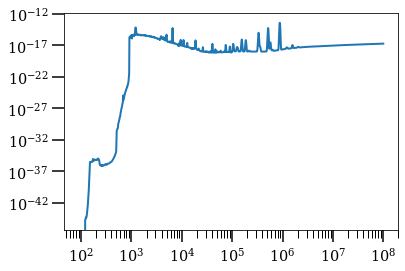

In [ ]:
plt.loglog(wave_unred, sed_unscaled[1])

In [ ]:
photo_for_lc['LSST'].shape

(36164872, 6)

In [ ]:
for rand_gal_idx in np.random.randint(low=0, high=photo_for_lc['LSST'].shape[0], size=30):
    print(photo_for_lc['LSST'][rand_gal_idx])

[46.113 49.604 48.431 46.306 49.967 46.981]
[52.858 51.715 52.152 53.324 50.069 52.501]
[49.053 52.914 51.028 48.598 53.989 50.073]
[45.65  47.409 45.98  44.436 48.165 45.726]
[51.916 51.214 50.621 52.173 70.946 51.711]
[46.768 45.455 46.422 46.934 50.343 46.595]
[47.101 46.145 46.77  47.086 46.825 46.98 ]
[45.683 46.396 46.606 45.962 46.06  45.819]
[53.381 52.348 52.759 53.778 50.738 53.083]
[51.551 50.506 50.917 51.874 49.08  51.206]
[44.185 46.681 45.204 43.603 47.541 44.143]
[48.641 48.733 48.792 48.13  48.734 48.638]
[49.426 50.948 47.997 49.59  73.736 49.254]
[55.091 53.355 54.619 55.358 58.56  54.856]
[45.455 45.631 45.945 45.025 45.281 45.488]
[49.65  48.617 49.006 49.929 47.33  49.298]
[49.657 48.759 49.093 49.989 47.199 49.404]
[48.708 47.819 48.149 49.031 46.358 48.459]
[46.105 44.72  45.723 46.281 46.652 45.913]
[45.798 46.04  46.322 45.879 45.79  46.542]
[48.95  49.439 49.55  49.084 49.374 49.722]
[45.27  44.705 44.135 45.444 66.103 45.127]
[45.842 45.738 46.035 45.608 45.

In [ ]:
sed_unscaled.shape

(10, 1963)

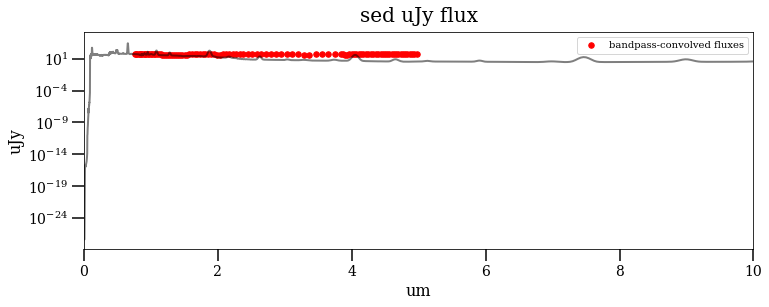

In [ ]:
np.random.seed(4)
rand_gal_idx = np.random.randint(low=0, high=match_redshift.shape[0], size=1)
# z_chunk = match_redshift[rand_gal_idx]
sed_unscaled = unscale_sed(scaler_output, sed_for_lc['SED'][rand_gal_idx])[0]
# print('REDSHIFT: ', z_chunk)
# mags_tuple = photometric_bandpass(sed_unscaled, wave_unred, z_chunk, all_filters, wave_lims, True);
# each_wave_red = wave_unred[wave_mask]*(1 + redshift_in[rand_gal_idx])

# wave_mask = np.where( (wave_unred>wave_min) & (wave_unred<wave_max))
# wave_mask = True
# each_wave_red = wave_unred[wave_mask][1]*(1 + matches_for_lc['redshift'][rand_gal_idx])
each_wave_red = wave_unred/1e4

plot_sed_with_photo(central_wavelengths, each_wave_red, 1e14*sed_unscaled, bandpass_wavs, photo_for_lc['SPHEREx'][rand_gal_idx][0])

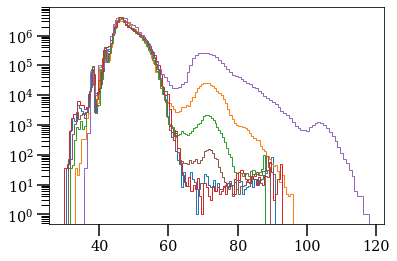

: 

In [ ]:
plt.hist(photo_for_lc['LSST'][:, 0], bins = 100, histtype='step');
plt.hist(photo_for_lc['LSST'][:, 1], bins = 100, histtype='step');
plt.hist(photo_for_lc['LSST'][:, 2], bins = 100, histtype='step');
plt.hist(photo_for_lc['LSST'][:, 3], bins = 100, histtype='step');
plt.hist(photo_for_lc['LSST'][:, 4], bins = 100, histtype='step');
plt.hist(photo_for_lc['LSST'][:, 5], bins = 100, histtype='step');
plt.yscale('log')